### 直方图

In [9]:
import cv2
import numpy as np
def ImageHist(image,type):
    color = (255,255,255)
    windowName = 'Gray'
    if type == 31:
        color = (255,0,0)
        windowName = 'B Hist'
    elif type == 32:
        color = (0,255,0)
        windowName = 'G Hist'
    elif type == 33:
        color = (0,0,255)
        windowName = 'R Hist'
    # 1 image, 2 [0], 3 mask None, 4 256, 5 0-255 (统计数量)
    hist = cv2.calcHist([image],[0],None,[256],[0.0,255.0])
#     print(hist)
    # 获取最大值、最小值及其下标
    minV,maxV,minL,maxL = cv2.minMaxLoc(hist)
#     print(minV, maxV, minL, maxL)
    histImg = np.zeros([256,256,3],np.uint8)
    for h in range(256):
        intenNormal = int(hist[h]*256/maxV)
        # 线段绘制
        cv2.line(histImg,(h,256),(h,256-intenNormal),color)
    cv2.imshow(windowName,histImg)
    return histImg
img = cv2.imread('image.jpg',1)
# RGB -> R G B
channels = cv2.split(img)
# print(channels[0].shape)
for i in range(0,3):
    ImageHist(channels[i],31+i)
cv2.waitKey(1000)

(547, 730)


-1

In [10]:
import cv2
import numpy as np
img = cv2.imread('181.jpg', 1)
# 转灰度
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('img', gray)
# 均衡化
dst = cv2.equalizeHist(gray)
cv2.imshow('dst', dst)
cv2.waitKey(1000)

-1

### 彩色图像均衡化

In [3]:
import cv2
import numpy as np
img = cv2.imread('image.jpg', 1)
cv2.imshow('img', img)
# 通道分解
(b, g, r) = cv2.split(img)
bH = cv2.equalizeHist(b)
gH = cv2.equalizeHist(g)
rH = cv2.equalizeHist(r)
# 通道合成
dst = cv2.merge((bH, gH, rH))
cv2.imshow('dst', dst)
cv2.waitKey(1000)

-1

### YUV 直方图像均衡化

In [2]:
import cv2
import numpy as np
img = cv2.imread('image.jpg', 1)
imgYUV = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
cv2.imshow('img', img)
# 通道分解
(b, g, r) = cv2.split(imgYUV)
b = cv2.equalizeHist(b)
# 通道合成
dst = cv2.merge((b, g, r))
dst = cv2.cvtColor(dst, cv2.COLOR_YCrCb2BGR)
cv2.imshow('dst', dst)
cv2.waitKey(1000)

-1

### 灰度直方图源码

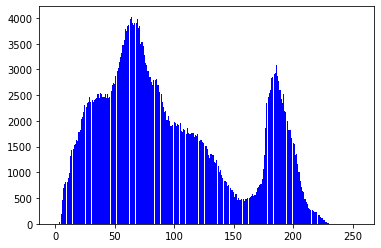

-1

In [7]:
# 1 0-255 2 概率 
# 本质：统计每个像素灰度 出现的概率 0-255 p
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('image.jpg',1)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
count = np.zeros(256,np.float)
for i in range(0,height):
    for j in range(0,width):
        pixel = gray[i,j]
        index = int(pixel)
        count[index] = count[index]+1
# for i in range(0,255):
#     count[i] = count[i]/(height*width)
x = np.linspace(0,255,256)
y = count
plt.bar(x,y,0.9,alpha=1,color='b')
plt.show()
cv2.waitKey(1000)

### 彩色直方图源码(概率图)

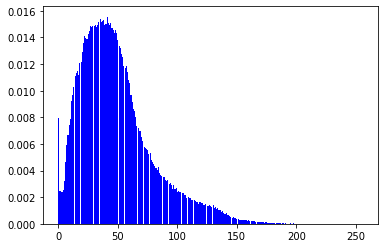

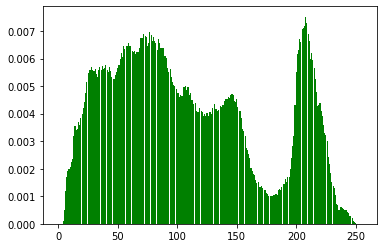

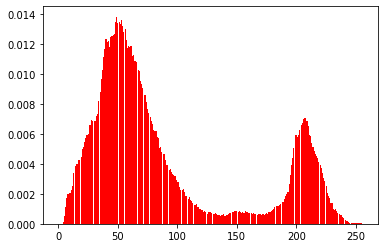

-1

In [6]:
# 本质：统计每个像素灰度 出现的概率 0-255 p
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('image.jpg',1)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]

count_b = np.zeros(256,np.float)
count_g = np.zeros(256,np.float)
count_r = np.zeros(256,np.float)
for i in range(0,height):
    for j in range(0,width):
        (b,g,r) = img[i,j]
        index_b = int(b)
        index_g = int(g)
        index_r = int(r)
        count_b[index_b] = count_b[index_b]+1
        count_g[index_g] = count_g[index_g]+1
        count_r[index_r] = count_r[index_r]+1
for i in range(0,256):
    count_b[i] = count_b[i]/(height*width)
    count_g[i] = count_g[i]/(height*width)
    count_r[i] = count_r[i]/(height*width)
# linspace 1 开始, 2 结束, 3 多少份
x = np.linspace(0,255,256)
y1 = count_b
plt.figure()
plt.bar(x,y1,0.9,alpha=1,color='b')
y2 = count_g
plt.figure()
plt.bar(x,y2,0.9,alpha=1,color='g')
y3 = count_r
plt.figure()
plt.bar(x,y3,0.9,alpha=1,color='r')
plt.show()
cv2.waitKey(1000)



### 灰度直方图均衡化

In [8]:
# 本质：统计每个像素灰度 出现的概率 0-255 p
# 累计概率 
# 1 0.2  0.2
# 2 0.3  0.5
# 3 0.1  0.6
# 256 
# 100 0.5 255*0.5 = new 
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('image.jpg', 1)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('img',gray)
count = np.zeros(256, np.float)
for i in range(0, height):
    for j in range(0, width):
        pixel = gray[i, j]
        index = int(pixel)
        count[index] = count[index] + 1
for i in range(256):
    count[i] = count[i] / (height * width)

#计算累计概率
sum1 = float(0)
for i in range(0,256):
    sum1 = sum1+count[i]
    count[i] = sum1
    
# 计算映射表
map1 = np.zeros(256,np.uint16)
for i in range(0,256):
    map1[i] = np.uint16(count[i]*255)
    
# 映射
for i in range(0,height):
    for j in range(0,width):
        pixel = gray[i,j]
        gray[i,j] = map1[pixel]
cv2.imshow('dst',gray)
cv2.waitKey(1000)

-1

### 彩色直方图均衡化

In [1]:
# 本质：统计每个像素灰度 出现的概率 0-255 p
# 累计概率 
# 1 0.2  0.2
# 2 0.3  0.5
# 3 0.1  0.6
# 256 
# 100 0.5 255*0.5 = new 
# 1 统计每个颜色出现的概率 2 累计概率 1 3 0-255 255*p
# 4 pixel 
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('image.jpg',1)
cv2.imshow('src',img)

imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]

count_b = np.zeros(256,np.float)
count_g = np.zeros(256,np.float)
count_r = np.zeros(256,np.float)
for i in range(0,height):
    for j in range(0,width):
        (b,g,r) = img[i,j]
        index_b = int(b)
        index_g = int(g)
        index_r = int(r)
        count_b[index_b] = count_b[index_b]+1
        count_g[index_g] = count_g[index_g]+1
        count_r[index_r] = count_r[index_r]+1
for i in range(0,255):
    count_b[i] = count_b[i]/(height*width)
    count_g[i] = count_g[i]/(height*width)
    count_r[i] = count_r[i]/(height*width)
#计算累计概率
sum_b = float(0)
sum_g = float(0)
sum_r = float(0)
for i in range(0,256):
    sum_b = sum_b+count_b[i]
    sum_g = sum_g+count_g[i]
    sum_r = sum_r+count_r[i]
    count_b[i] = sum_b
    count_g[i] = sum_g
    count_r[i] = sum_r
#print(count)
# 计算映射表
map_b = np.zeros(256,np.uint16)
map_g = np.zeros(256,np.uint16)
map_r = np.zeros(256,np.uint16)
for i in range(0,256):
    map_b[i] = np.uint16(count_b[i]*255)
    map_g[i] = np.uint16(count_g[i]*255)
    map_r[i] = np.uint16(count_r[i]*255)
# 映射
dst = np.zeros((height,width,3),np.uint8)
for i in range(0,height):
    for j in range(0,width):
        (b,g,r) = img[i,j]
        b = map_b[b]
        g = map_g[g]
        r = map_r[r]
        dst[i,j] = (b,g,r)
cv2.imshow('dst',dst)
cv2.waitKey(1000)


233